In [1]:
from utils import database

import numpy as np
import pandas as pd

import folium as fl
from folium import plugins
import geopandas as gpd

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("classic")

In [96]:
properties = database.get_properties()

df = pd.DataFrame(
    properties, 
    columns=['title', 'letting', 'price', 'latitude', 'longitude', 'url']
)

df['furnished'] = df['letting'].astype(str).str.extract(r"('[A-Za-z.?!0-9-]+')")
df['bedrooms'] = df['title'].str.extract(r"(\d{1,2})")

regex = r'(flat|house|House\sShare|House|Farm\sland|Plot|apartment|Equestrian|sheltered\shousing|Lodge|triplex|gite|private halls|maisonette|finca|Maisonette|barn|property|Property|chalet|bungalow|Land|duplex|cottage|Garage|Parking|Flat\sShare)'
df['type'] = df['title'].str.extract(regex)


# Getting the payment interval
df['payment_interval'] = df['price'].str.split(" ").str.get(-1)

# Cleaning the payment interval name, since some values have the ")" character
df['payment_interval'] = df['payment_interval'].apply(lambda x : x.replace(")",""))

df['price'] = df['price'].str.split("£").str.get(1).str.split(" ").str.get(0).str.replace(",","").astype(np.float32)
df[['latitude','longitude']] = df[['latitude', 'longitude']].astype(np.float)

def convert_price(x):
    
    if x['payment_interval'] == 'pw':
        return x['price'] * 4
    else:
        return x['price']

df['monthly_price'] = df.apply(convert_price, axis=1)

london_districts = gpd.read_file("london.geojson")
london_districts['centroid_x'] = london_districts.geometry.centroid.x
london_districts['centroid_y'] = london_districts.geometry.centroid.y

properties_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs=london_districts.crs)
df = gpd.sjoin(london_districts, properties_geo)

df.head()

name  cartodb_id           created_at           updated_at  \
0  Barking and Dagenham           1  2013-09-16T02:14:14  2013-09-16T02:14:14   
0  Barking and Dagenham           1  2013-09-16T02:14:14  2013-09-16T02:14:14   
0  Barking and Dagenham           1  2013-09-16T02:14:14  2013-09-16T02:14:14   
0  Barking and Dagenham           1  2013-09-16T02:14:14  2013-09-16T02:14:14   
0  Barking and Dagenham           1  2013-09-16T02:14:14  2013-09-16T02:14:14   

                                            geometry  centroid_x  centroid_y  \
0  MULTIPOLYGON (((0.07263 51.53122, 0.07263 51.5...    0.133543   51.545269   
0  MULTIPOLYGON (((0.07263 51.53122, 0.07263 51.5...    0.133543   51.545269   
0  MULTIPOLYGON (((0.07263 51.53122, 0.07263 51.5...    0.133543   51.545269   
0  MULTIPOLYGON (((0.07263 51.53122, 0.07263 51.5...    0.133543   51.545269   
0  MULTIPOLYGON (((0.07263 51.53122, 0.07263 51.5...    0.133543   51.545269   

   index_right                          title  \
0         8018         1 bedroom flat to rent   
0        11867        2 bedroom house to rent   
0        25030         2 bedroom flat to rent   
0        24855         2 bedroom flat to rent   
0        15969  1 bedroom house share to rent   

                             letting   price  latitude  longitude  \
0     {'Furnishing:': 'Unfurnished'}   925.0  51.56130    0.12159   
0     {'Furnishing:': 'Unfurnished'}  1300.0  51.55207    0.15941   
0     {'Furnishing:': 'Unfurnished'}  1175.0  51.55256    0.15852   
0     {'Furnishing:': 'Unfurnished'}  1175.0  51.55259    0.15879   
0  {'Furnishing:': 'Part-furnished'}   475.0  51.55292    0.12588   

                                                 url         furnished  \
0  https://www.rightmove.co.uk/property-to-rent/p...     'Unfurnished'   
0  https://www.rightmove.co.uk/property-to-rent/p...     'Unfurnished'   
0  https://www.rightmove.co.uk/property-to-rent/p...     'Unfurnished'   
0  https://www.rightmove.co.uk/property-to-rent/p...     'Unfurnished'   
0  https://www.rightmove.co.uk/property-to-rent/p...  'Part-furnished'   

  bedrooms   type payment_interval  monthly_price  
0        1   flat              pcm          925.0  
0        2  house              pcm         1300.0  
0        2   flat              pcm         1175.0  
0        2   flat              pcm         1175.0  
0        1  house              pcm          475.0

In [74]:
df[df['title'].str.extract(r"(flat|house|House\sShare|apartment|share|maisonette|property|bungalow|Land)").isnull().values]

name  cartodb_id           created_at           updated_at  \
1    Barnet           2  2013-09-16T02:14:14  2013-09-16T02:14:14   
1    Barnet           2  2013-09-16T02:14:14  2013-09-16T02:14:14   
1    Barnet           2  2013-09-16T02:14:14  2013-09-16T02:14:14   
1    Barnet           2  2013-09-16T02:14:14  2013-09-16T02:14:14   
1    Barnet           2  2013-09-16T02:14:14  2013-09-16T02:14:14   
..      ...         ...                  ...                  ...   
32  Croydon          33  2013-09-16T02:14:14  2013-09-16T02:14:14   
32  Croydon          33  2013-09-16T02:14:14  2013-09-16T02:14:14   
32  Croydon          33  2013-09-16T02:14:14  2013-09-16T02:14:14   
32  Croydon          33  2013-09-16T02:14:14  2013-09-16T02:14:14   
32  Croydon          33  2013-09-16T02:14:14  2013-09-16T02:14:14   

                                             geometry  centroid_x  centroid_y  \
1   MULTIPOLYGON (((-0.25216 51.58802, -0.25218 51...   -0.210019   51.616026   
1   MULTIPOLYGON (((-0.25216 51.58802, -0.25218 51...   -0.210019   51.616026   
1   MULTIPOLYGON (((-0.25216 51.58802, -0.25218 51...   -0.210019   51.616026   
1   MULTIPOLYGON (((-0.25216 51.58802, -0.25218 51...   -0.210019   51.616026   
1   MULTIPOLYGON (((-0.25216 51.58802, -0.25218 51...   -0.210019   51.616026   
..                                                ...         ...         ...   
32  MULTIPOLYGON (((-0.00715 51.33367, -0.00715 51...   -0.087164   51.355336   
32  MULTIPOLYGON (((-0.00715 51.33367, -0.00715 51...   -0.087164   51.355336   
32  MULTIPOLYGON (((-0.00715 51.33367, -0.00715 51...   -0.087164   51.355336   
32  MULTIPOLYGON (((-0.00715 51.33367, -0.00715 51...   -0.087164   51.355336   
32  MULTIPOLYGON (((-0.00715 51.33367, -0.00715 51...   -0.087164   51.355336   

    index_right                      title                         letting  \
1         14774   2 bedroom duplex to rent  {'Furnishing:': 'Unfurnished'}   
1         10187  2 bedroom cottage to rent  {'Furnishing:': 'Unfurnished'}   
1         19319   2 bedroom duplex to rent  {'Furnishing:': 'Unfurnished'}   
1         10393           Property to rent                              {}   
1         19482           Property to rent                              {}   
..          ...                        ...                             ...   
32        20711           Property to rent                              {}   
32        17581           Property to rent  {'Furnishing:': 'Unfurnished'}   
32        18392         Flat Share to rent    {'Furnishing:': 'Furnished'}   
32         7435         Flat Share to rent    {'Furnishing:': 'Furnished'}   
32        18352         Flat Share to rent                              {}   

      price  latitude  longitude  \
1    1250.0  51.65215   -0.17747   
1    1700.0  51.66419   -0.19887   
1     369.0  51.61211   -0.21735   
1   45000.0  51.61153   -0.17541   
1    1325.0  51.59444   -0.23797   
..      ...       ...        ...   
32  18000.0  51.38097   -0.07187   
32    850.0  51.38539   -0.07305   
32    490.0  51.36573   -0.09924   
32    490.0  51.36573   -0.09927   
32    600.0  51.36688   -0.10263   

                                                  url      furnished  \
1   https://www.rightmove.co.uk/property-to-rent/p...  'Unfurnished'   
1   https://www.rightmove.co.uk/property-to-rent/p...  'Unfurnished'   
1   https://www.rightmove.co.uk/property-to-rent/p...  'Unfurnished'   
1   https://www.rightmove.co.uk/property-to-rent/p...            NaN   
1   https://www.rightmove.co.uk/property-to-rent/p...            NaN   
..                                                ...            ...   
32  https://www.rightmove.co.uk/property-to-rent/p...            NaN   
32  https://www.rightmove.co.uk/property-to-rent/p...  'Unfurnished'   
32  https://www.rightmove.co.uk/property-to-rent/p...    'Furnished'   
32  https://www.rightmove.co.uk/property-to-rent/p...    'Furnished'   
32  https://www.rightmove.co.uk/property-to

# Distribution of payment interval

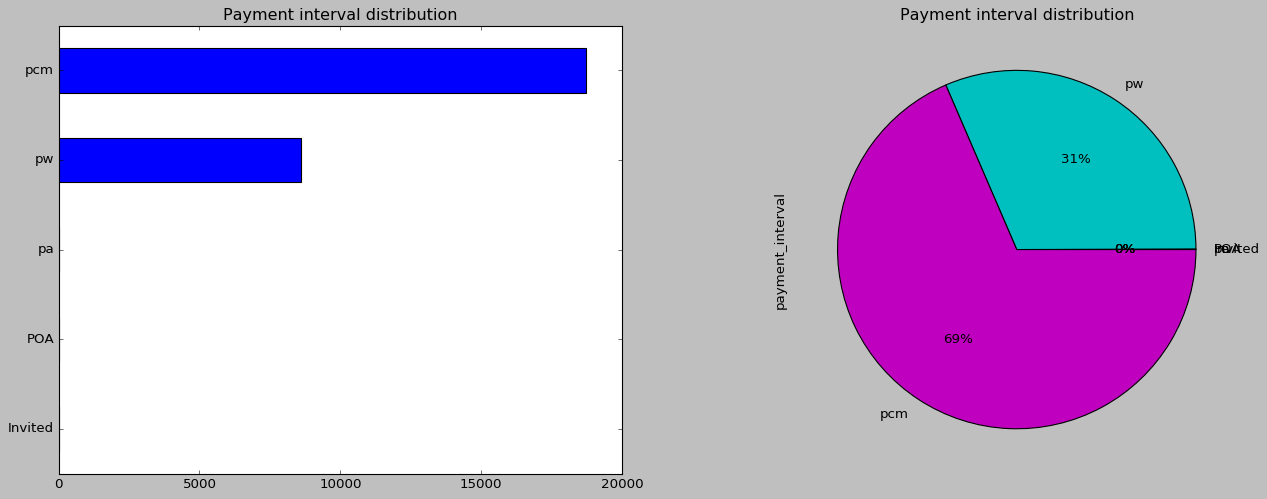

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))

values = df['payment_interval'].value_counts().sort_values()
values.plot(kind='barh', title="Payment interval distribution", ax=ax[0])
values.plot(kind='pie', title="Payment interval distribution", ax=ax[1], autopct='%1.0f%%')


plt.show()

# Distribution by district

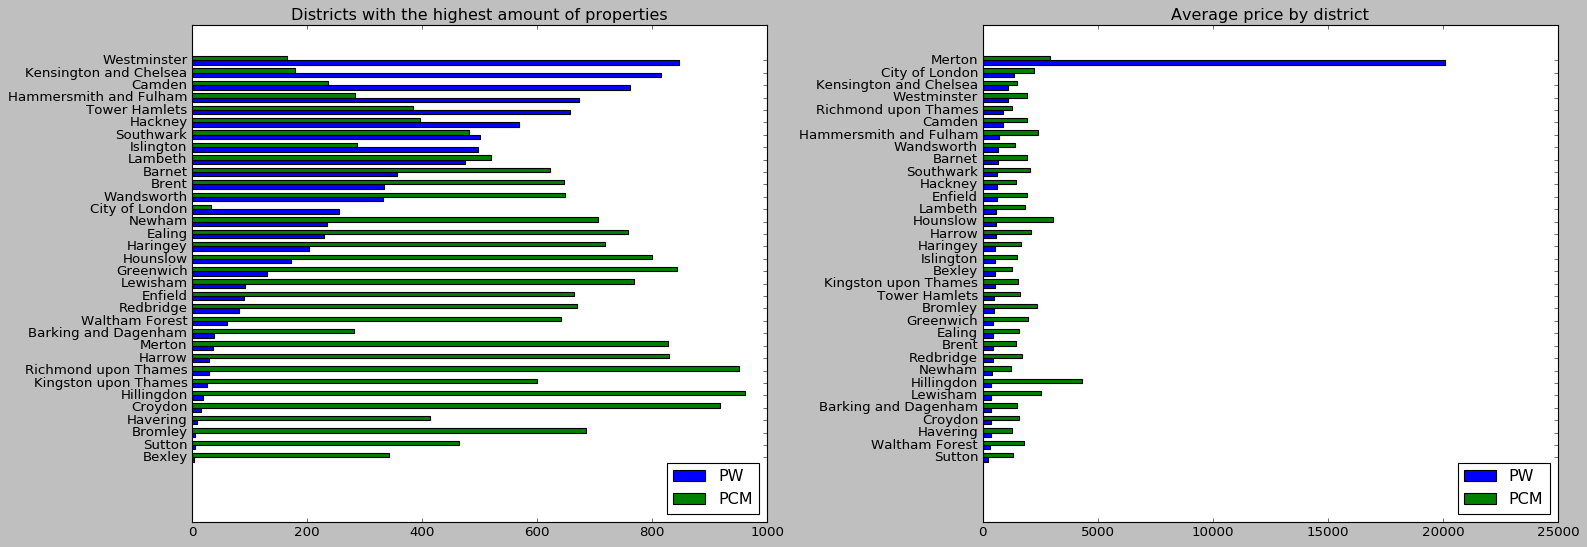

In [65]:
pw = df[df['payment_interval'] == 'pw']
pcm = df[df['payment_interval'] == 'pcm']

pw_distribution = pw['name'].value_counts().sort_values()
pcm_distribution = pcm['name'].value_counts().sort_values()
pcm_distribution = pcm_distribution.loc[ pw_distribution.index.values ]


fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ind = np.arange(len(pcm_distribution))    # the x locations for the groups
width = 0.35

p1 = ax[0].barh(ind, pw_distribution.values, width)
p2 = ax[0].barh(ind + width, pcm_distribution.values, width)

ax[0].set_title('Districts with the highest amount of properties')
ax[0].set_yticks(ind + width / 2)
ax[0].set_yticklabels(pw_distribution.index.values)
ax[0].legend((p1[0], p2[0]), ('PW', 'PCM'), loc='lower right')


pw_average_price = pw.groupby('name', as_index=False)['price'].mean().sort_values(by='price')
pcm_average_price = pcm.groupby('name', as_index=False)['price'].mean()

ind = np.arange(len(pcm_average_price))    # the x locations for the groups
width = 0.35

p1 = ax[1].barh(ind, pw_average_price['price'], width)
p2 = ax[1].barh(ind + width, pcm_average_price['price'], width)

ax[1].set_title('Average price by district')
ax[1].set_yticks(ind + width / 2)
ax[1].set_yticklabels(pw_average_price.name.values)
ax[1].legend((p1[0], p2[0]), ('PW', 'PCM'), loc='lower right')

fig.tight_layout()

plt.show()

Regarding the left plot :

Why this behavior happens ? Is it related to the lack of data ?  The obvius pattern would be same categories following the same distribution...

Does it happen because of the tourists ? Westminter has a lot of attractions ....


Regarding the right plot :

It's clear the data is being influenced by outliers ..

# THIS IS NOT THE PROPER WAY TO ANALYSE OUTLIERS SINCE IT'S A MULTIDIMENSIONAL PROBLEM
# Outliers by district

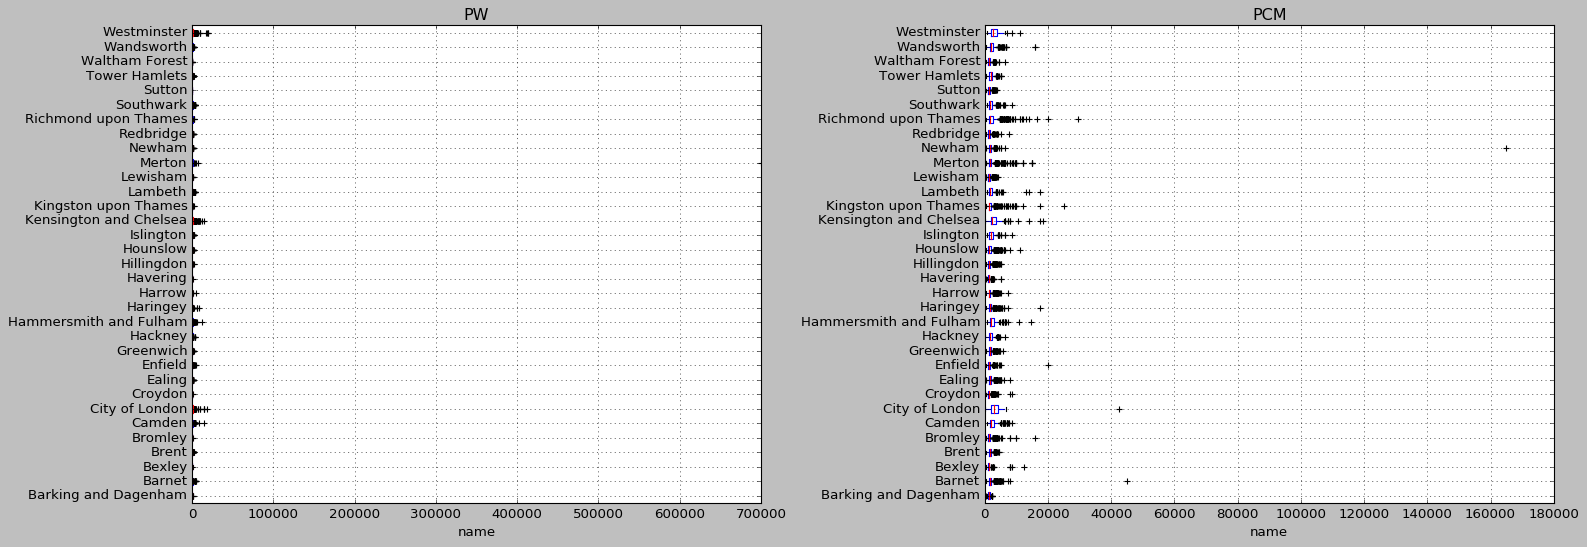

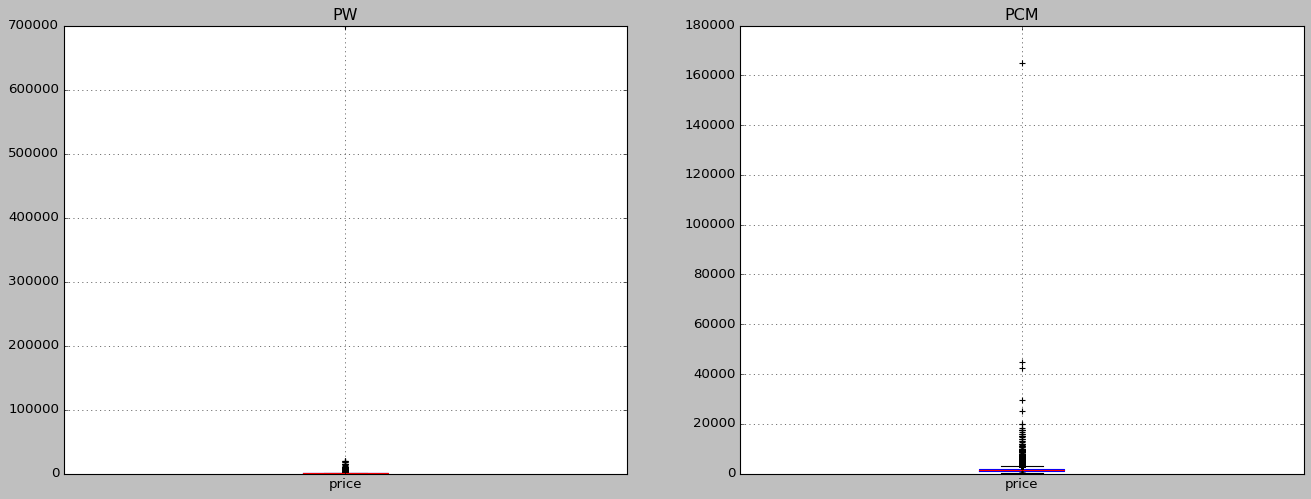

In [66]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

pw.sort_values(by='price').boxplot(column='price', by='name', vert=False, ax=ax[0])
pcm.sort_values(by='price').boxplot(column='price', by='name', vert=False, ax=ax[1])

ax[0].set_title("PW")
ax[1].set_title("PCM")

fig.suptitle("")
fig.tight_layout()

fig, ax = plt.subplots(1,2, figsize=(20,7))

pw.boxplot(column='price',ax=ax[0])
pcm.boxplot(column='price', ax=ax[1])

ax[0].set_title("PW")
ax[1].set_title("PCM")

plt.show()

# Why PW Merton prices are so high ?

In [31]:
merton = pw[pw.name == 'Merton']

print("Amount of Merton properties for rent weekly : " + str(len(merton)))
print("Merton values : ")
display(merton.sort_values(by="price", ascending=False)['price'])
print(
    "£ 700000.0 property URL : " + 
    merton.sort_values(by="price", ascending=False).iloc[0].url
)

Amount of Merton properties for rent weekly : 37
Merton values : 


22    700000.0
22      8000.0
22      4616.0
22      4250.0
22      2770.0
22      2750.0
22      2500.0
22      2308.0
22      2181.0
22      1200.0
22      1000.0
22       925.0
22       900.0
22       900.0
22       808.0
22       800.0
22       725.0
22       650.0
22       634.0
22       543.0
22       507.0
22       507.0
22       484.0
22       415.0
22       404.0
22       358.0
22       335.0
22       323.0
22       323.0
22       288.0
22       277.0
22       276.0
22       265.0
22       254.0
22       248.0
22       242.0
22       125.0
Name: price, dtype: float32

£ 700000.0 property URL : https://www.rightmove.co.uk/property-to-rent/property-56441586.html


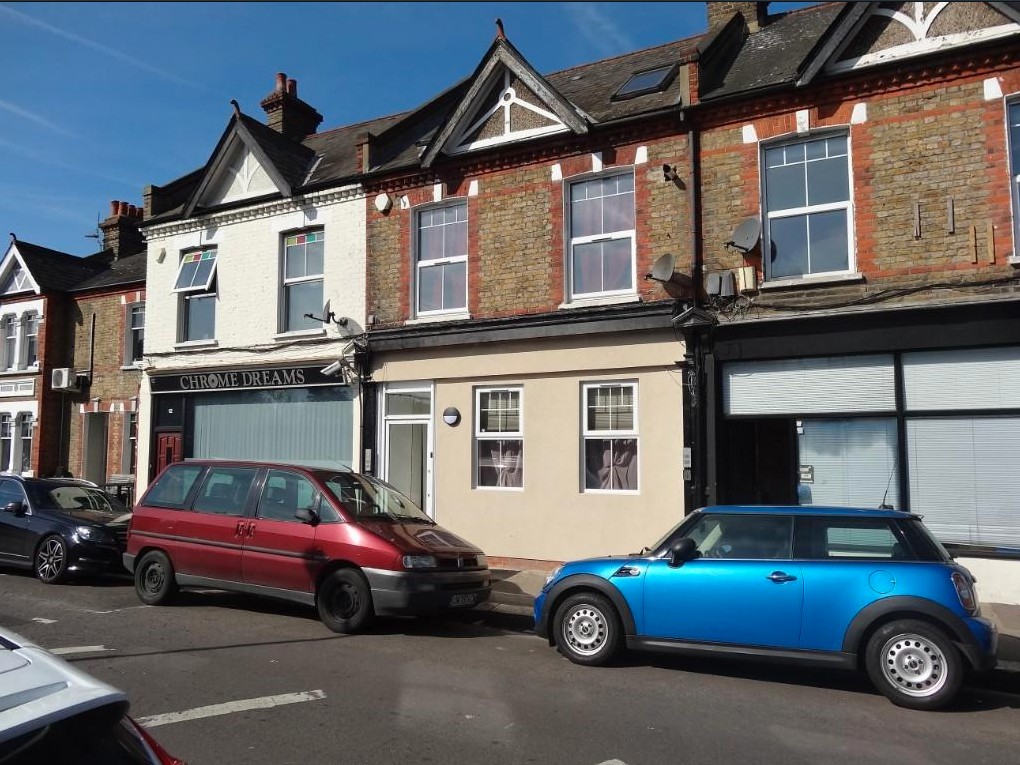
</br>
This is the picture of the £ 700.000 PW property. It has only one bedroom. It's clear that the owner has inserted a wrong value. 

# Removing outliers by district

In [58]:
# pw.reset_index(inplace=True)
# pcm.reset_index(inplace=True)

def get_outlier_indexes(data : pd.DataFrame, column : str):
    mask = np.abs(data[column] - data[column].mean()) > 3 * data[column].std()
    return data[mask].index.values

outlier_indexes = np.concatenate([ get_outlier_indexes(data, 'price') for idx, data in pw.groupby("name") ])
pw.iloc[outlier_indexes].url.values

array(['https://www.rightmove.co.uk/property-to-rent/property-85438613.html',
       'https://www.rightmove.co.uk/property-to-rent/property-75096829.html',
       'https://www.rightmove.co.uk/property-to-rent/property-75918937.html',
       'https://www.rightmove.co.uk/property-to-rent/property-83474357.html',
       'https://www.rightmove.co.uk/property-to-rent/property-73968394.html',
       'https://www.rightmove.co.uk/property-to-rent/property-75992836.html',
       'https://www.rightmove.co.uk/property-to-rent/property-88069526.html',
       'https://www.rightmove.co.uk/property-to-rent/property-63762975.html',
       'https://www.rightmove.co.uk/property-to-rent/property-73681336.html',
       'https://www.rightmove.co.uk/property-to-rent/property-88609640.html',
       'https://www.rightmove.co.uk/property-to-rent/property-88301285.html',
       'https://www.rightmove.co.uk/property-to-rent/property-71567008.html',
       'https://www.rightmove.co.uk/property-to-rent/property-76

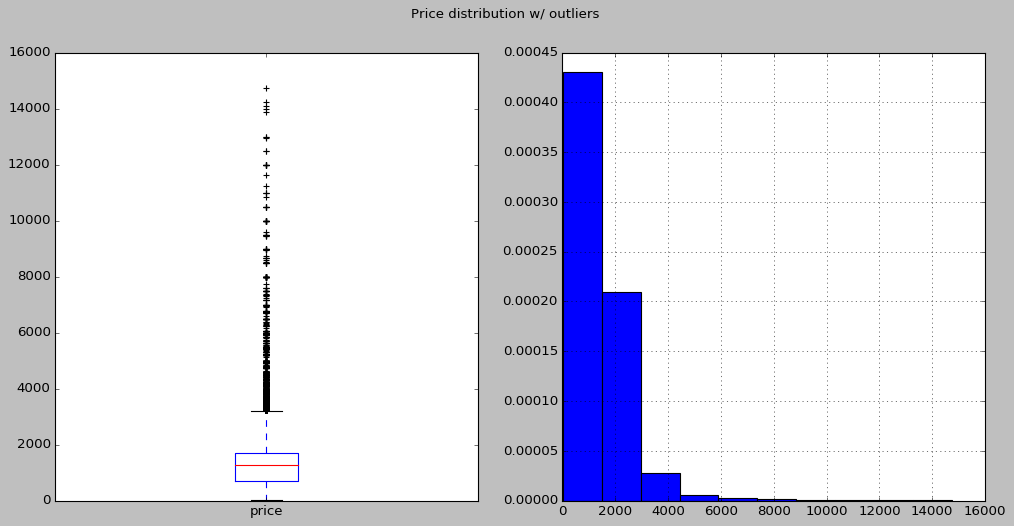

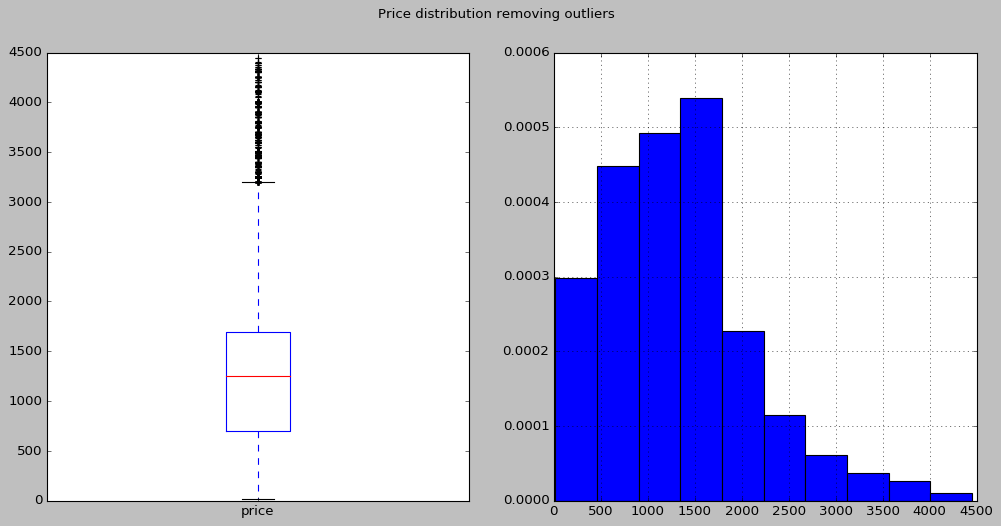

26844

In [9]:
fig, axis = plt.subplots(1,2, figsize=(15,7))


df['price'].plot(kind='box', ax=axis[0], title="")
df['price'].hist(ax=axis[1], density=1)

fig.suptitle("Price distribution w/ outliers")
plt.show()

# removing outliers
df = df[np.abs(df['price'] - df['price'].mean() ) <= df['price'].std() * 3]

fig, axis = plt.subplots(1,2, figsize=(15,7))


df['price'].plot(kind='box', ax=axis[0], title="")
df['price'].hist(ax=axis[1], density=1)

fig.suptitle("Price distribution removing outliers")
plt.show()

len(df)

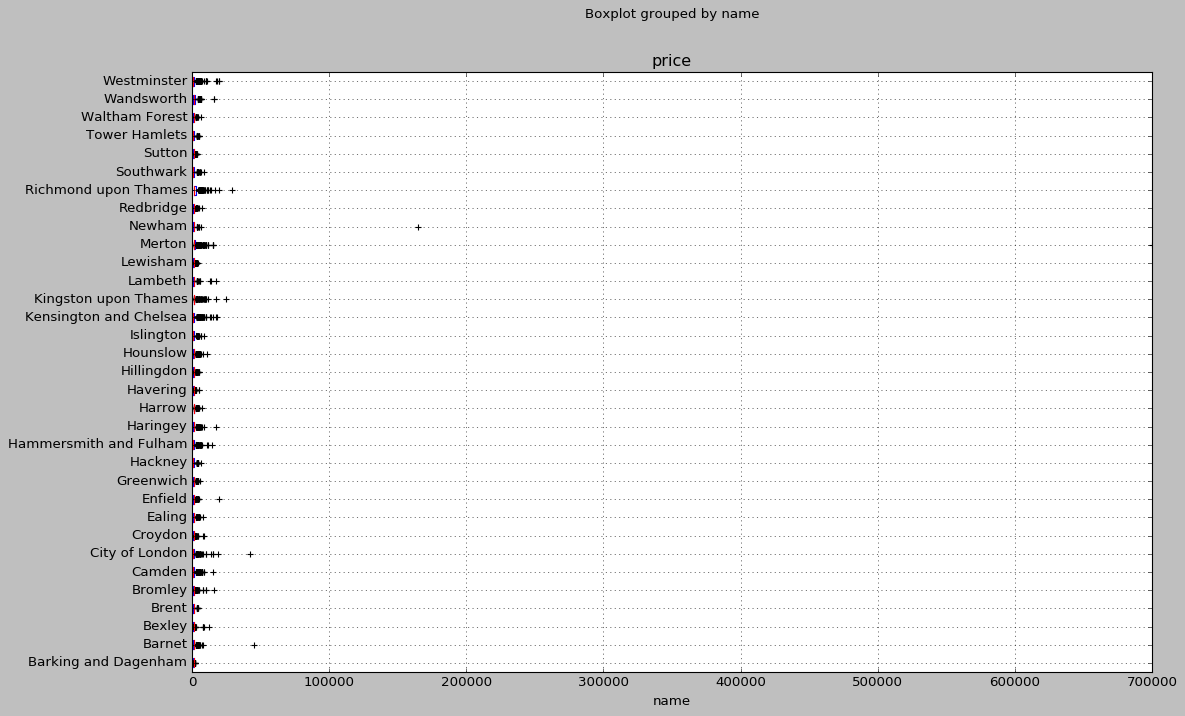

/home/marco/.local/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [89]:
district_average_price = df.groupby('name', as_index=False)['price'].mean()

# Add the district coordinates
avg_price_df = london_districts.merge(district_average_price, on="name")

df.boxplot(column='price', by='name', vert=False, figsize=(15,10))
plt.show()

m = fl.Map(
    location=[51.518055, -0.181273],
    zoom_start=10,
    zoom_control=False
)

fl.Choropleth(
    geo_data = avg_price_df,
    name="geometry",
    data=avg_price_df,
    columns=['name', 'price'],
    fill_color="YlOrRd",
    key_on="feature.properties.name",
    legend_name = 'Properties monthly rent price'
).add_to(m)

[
    fl.Marker(
        location=[row['centroid_y'], row['centroid_x']],
        popup=row['name'] 
    ).add_to(m)
    
    for ix, row in london_districts.iterrows()
]

display(m)